In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("nobel.csv")

In [42]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [50]:
first_ten_countries = df['birth_country'].value_counts().head(10)
print(first_ten_countries)




birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: count, dtype: int64


In [41]:
import pandas as pd
df = pd.read_csv("nobel.csv")
kategoriler = df['category'].unique()
ilk_kadin_kazananlar_listesi = []
for kategori in kategoriler:
    kadinlar_kategorisi = df[(df['category'] == kategori) & (df['sex'] == 'Female')]
    if not kadinlar_kategorisi.empty:
        ilk_kadin = kadinlar_kategorisi.sort_values('year').head(1)
        ilk_kadin_kazananlar_listesi.append(ilk_kadin)
ilk_kadin_kazananlar = pd.concat(ilk_kadin_kazananlar_listesi)[['year', 'category', 'full_name']]
print(ilk_kadin_kazananlar)



     year    category                                          full_name
62   1911   Chemistry                        Marie Curie, née Sklodowska
51   1909  Literature                      Selma Ottilia Lovisa Lagerlöf
235  1947    Medicine                    Gerty Theresa Cori, née Radnitz
29   1905       Peace  Baroness Bertha Sophie Felicita von Suttner, n...
19   1903     Physics                        Marie Curie, née Sklodowska
819  2009   Economics                                      Elinor Ostrom


In [42]:
import pandas as pd
df = pd.read_csv("nobel.csv")
kategoriler = df['category'].unique()
ilk_erkek_kazananlar_listesi = []
for kategori in kategoriler:
    erkekler_kategorisi = df[(df['category'] == kategori) & (df['sex'] == 'Male')]
    if not erkekler_kategorisi.empty:
        ilk_erkek = erkekler_kategorisi.sort_values('year').head(1)
        ilk_erkek_kazananlar_listesi.append(ilk_erkek)
ilk_erkek_kazananlar = pd.concat(ilk_erkek_kazananlar_listesi)[['year', 'category', 'full_name']]
print(ilk_erkek_kazananlar)



     year    category                     full_name
0    1901   Chemistry  Jacobus Henricus van 't Hoff
1    1901  Literature               Sully Prudhomme
2    1901    Medicine        Emil Adolf von Behring
3    1901       Peace             Jean Henry Dunant
5    1901     Physics        Wilhelm Conrad Röntgen
393  1969   Economics                 Ragnar Frisch


En çok Nobel ödülü kazanan ülke: United States of America
Kazanılan ödül sayısı: 259


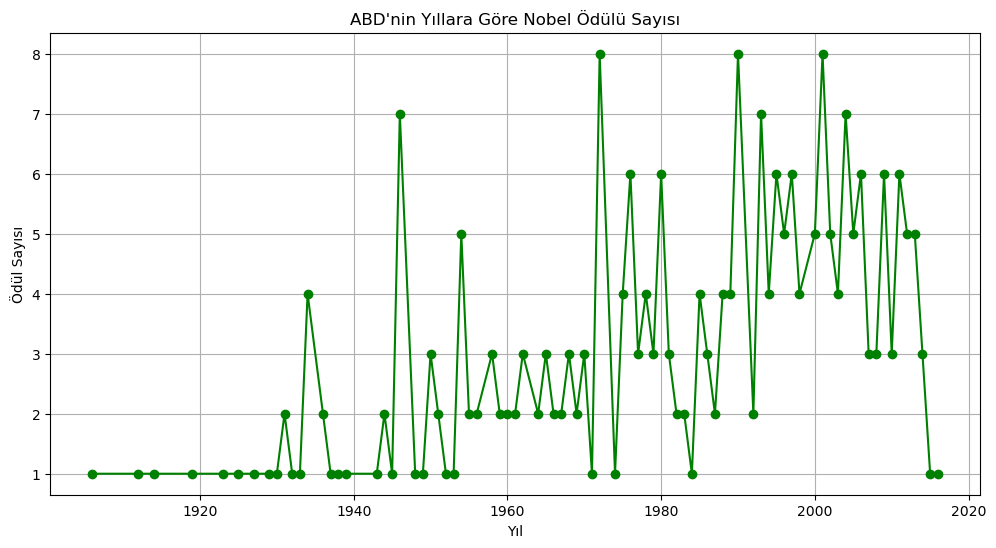

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("nobel.csv")
country_awards = df['birth_country'].value_counts()
most_awarded_country = country_awards.idxmax()
most_awarded_country_count = country_awards.max()
print("En çok Nobel ödülü kazanan ülke:", most_awarded_country)
print("Kazanılan ödül sayısı:", most_awarded_country_count)
if most_awarded_country == "United States of America":
   
    usa_awards = df[df['birth_country'] == "United States of America"]
    awards_by_year = usa_awards.groupby('year').size()

   
    plt.figure(figsize=(12, 6))
    plt.plot(awards_by_year.index, awards_by_year.values, marker='o', linestyle='-', color='green')
    plt.title("ABD'nin Yıllara Göre Nobel Ödülü Sayısı")
    plt.xlabel("Yıl")
    plt.ylabel("Ödül Sayısı")
    plt.grid(True)
    plt.show()
else:
    print("En çok ödül kazanan ülke ABD değil.")


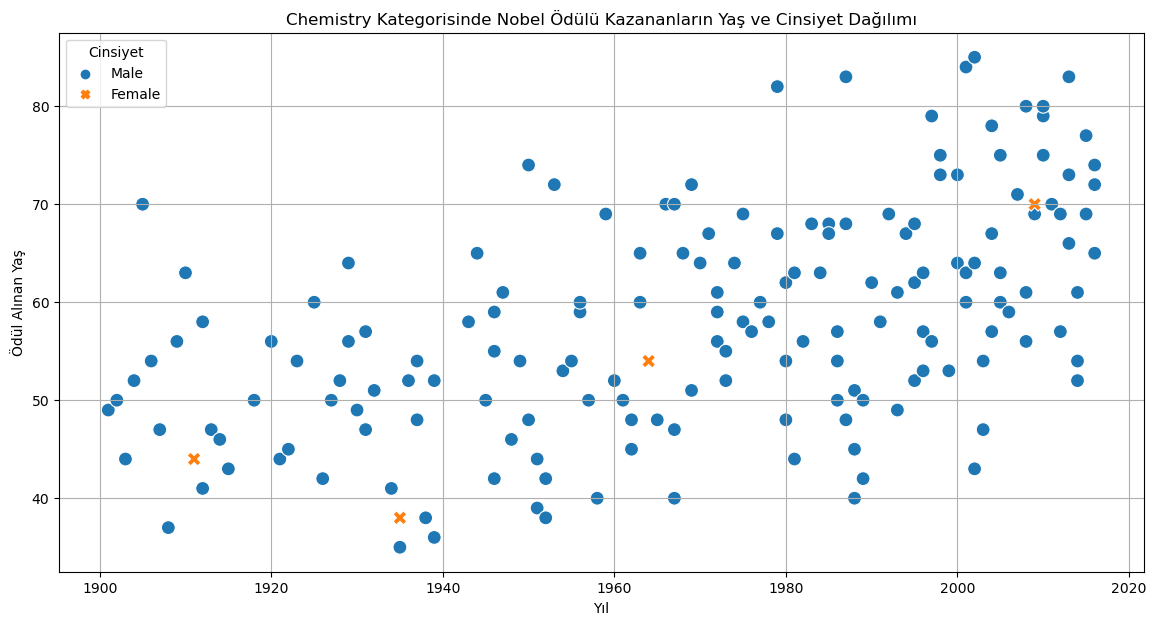

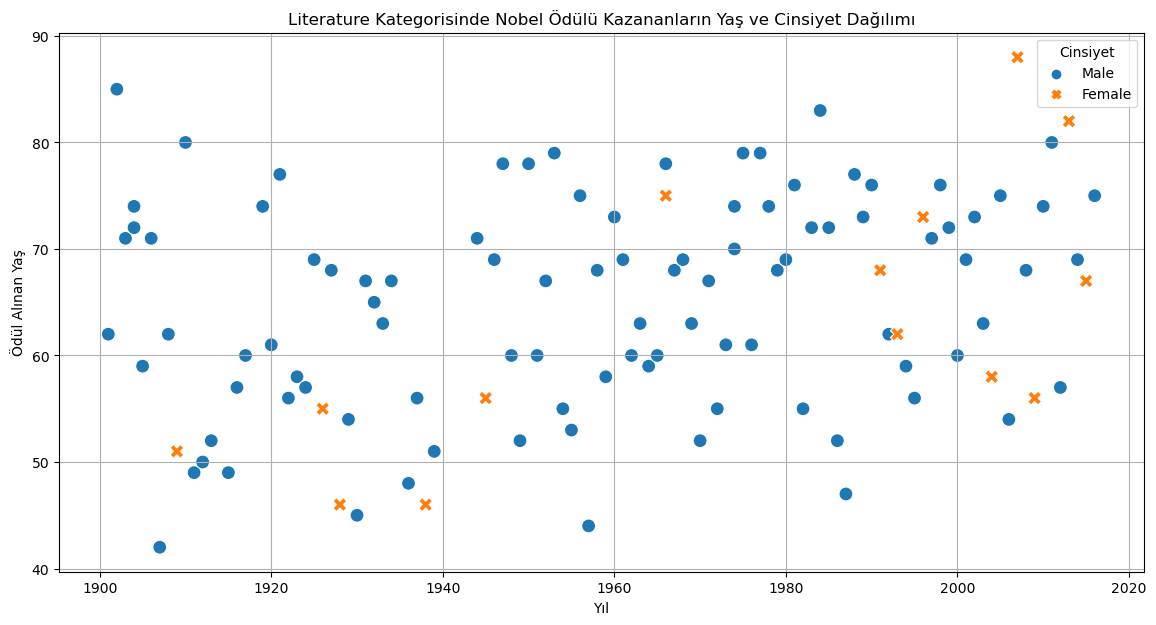

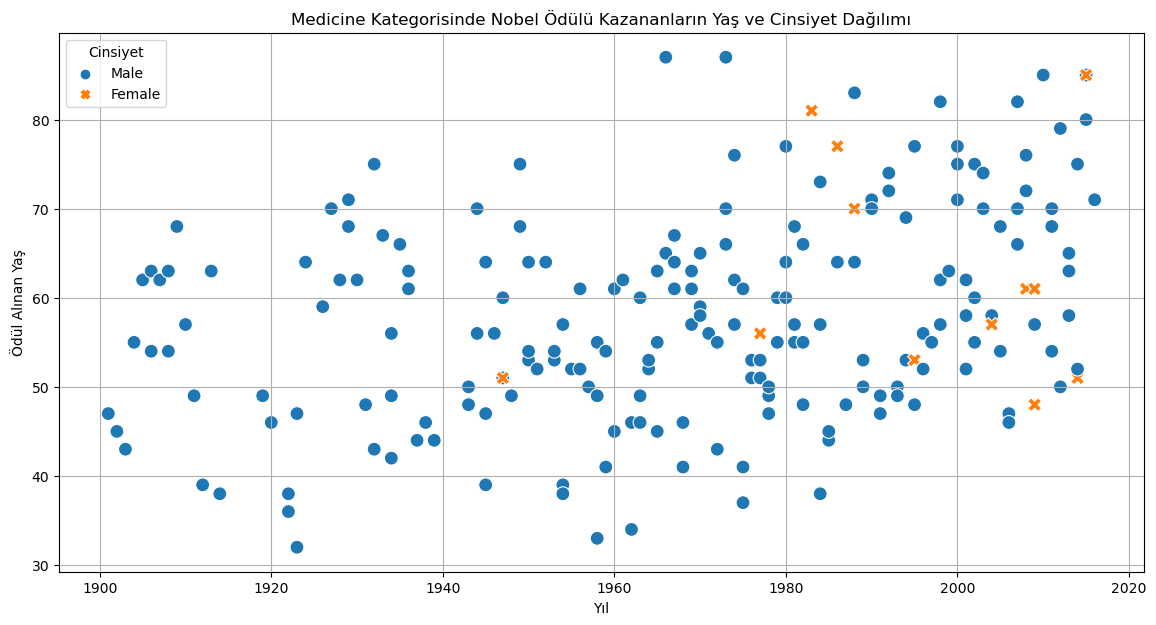

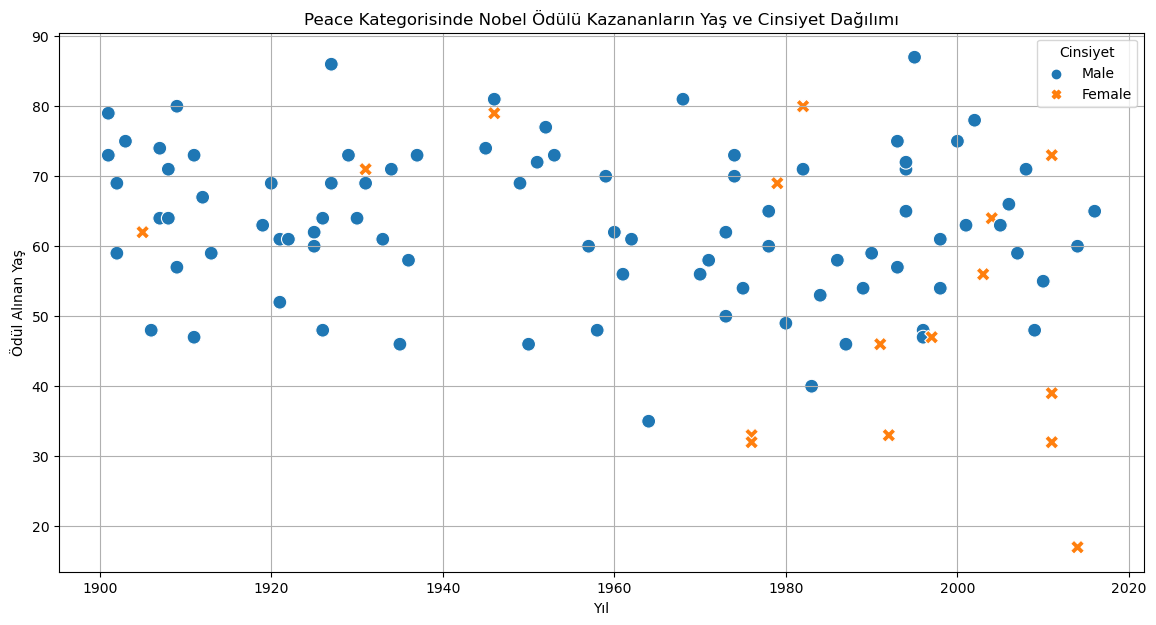

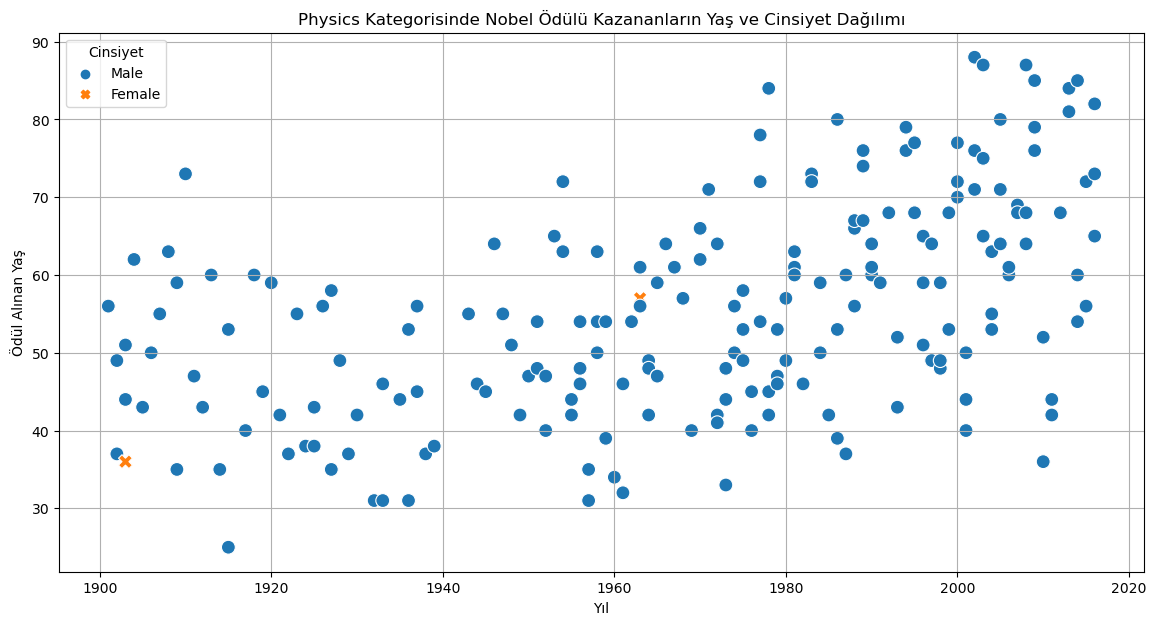

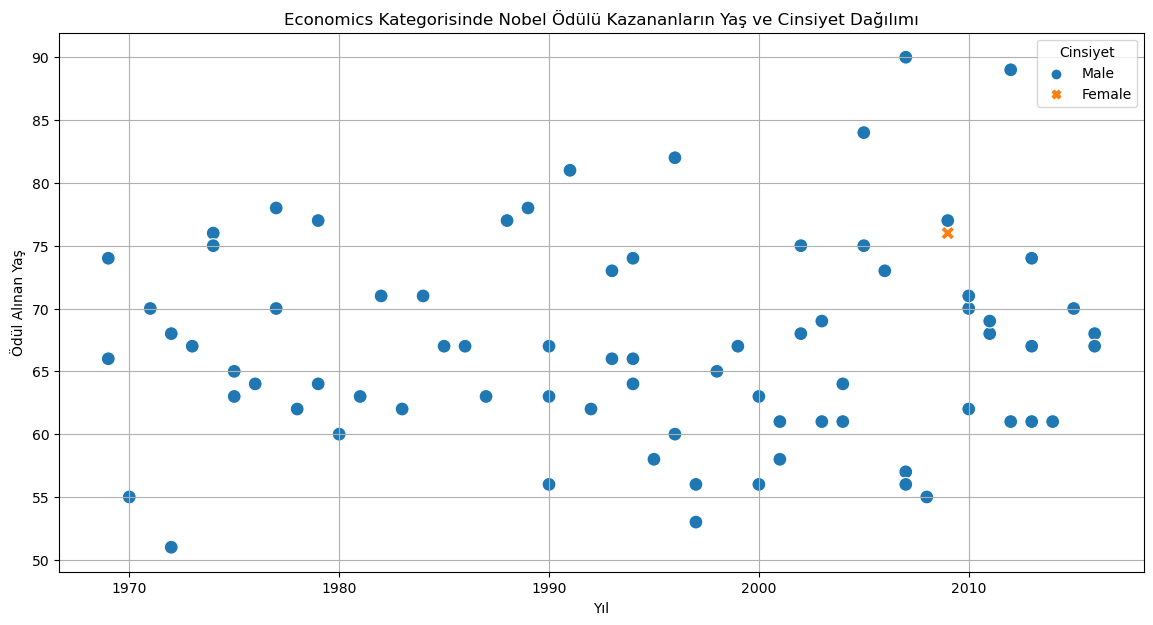

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("nobel.csv")
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['age_at_award'] = df['year'] - df['birth_date'].dt.year
categories = df['category'].unique()
for category in categories:
    plt.figure(figsize=(14, 7))
    category_df = df[df['category'] == category]
    sns.scatterplot(data=category_df, x='year', y='age_at_award', hue='sex', style='sex', s=100)

    plt.title(f'{category} Kategorisinde Nobel Ödülü Kazananların Yaş ve Cinsiyet Dağılımı')
    plt.xlabel('Yıl')
    plt.ylabel('Ödül Alınan Yaş')
    plt.legend(title='Cinsiyet')
    plt.grid(True)
    plt.show()


Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


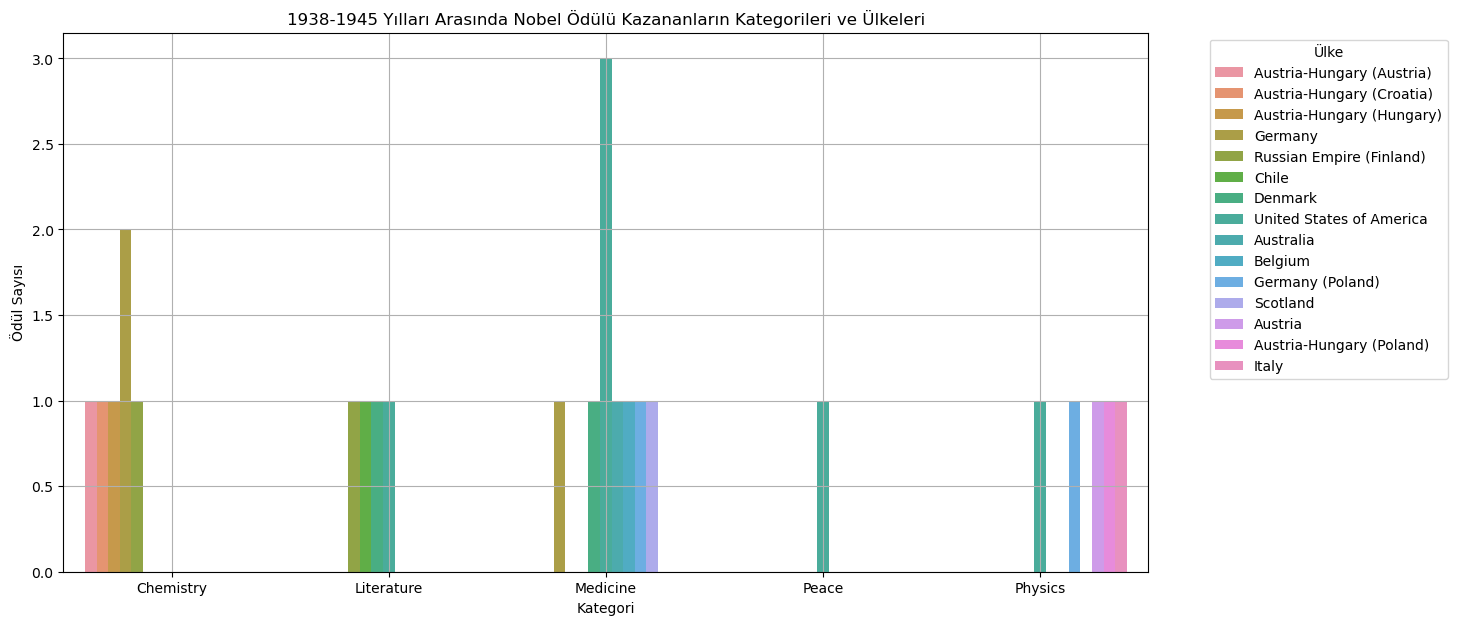

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("nobel.csv")
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df_1938_1945 = df[(df['year'] >= 1938) & (df['year'] <= 1945)]

print(df.columns)
category_country_count = df_1938_1945.groupby(['category', 'birth_country']).size().reset_index(name='count')
plt.figure(figsize=(14, 7))
sns.barplot(data=category_country_count, x='category', y='count', hue='birth_country')

plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazananların Kategorileri ve Ülkeleri')
plt.xlabel('Kategori')
plt.ylabel('Ödül Sayısı')
plt.legend(title='Ülke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



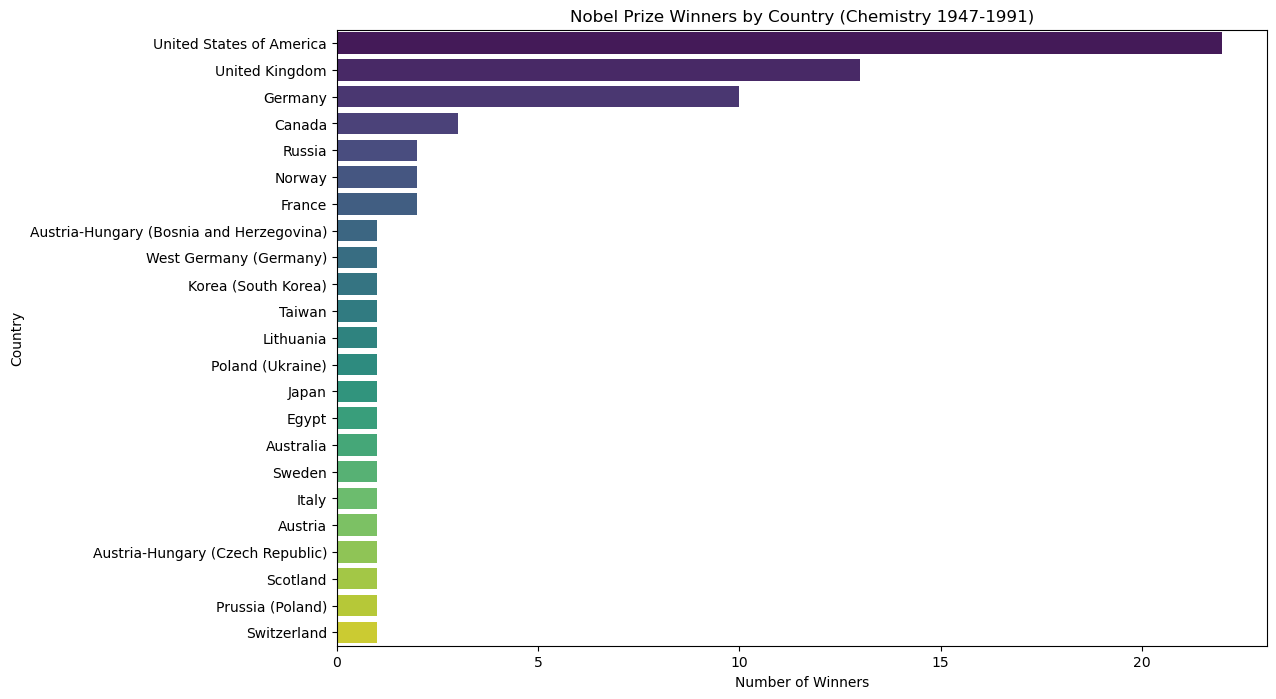

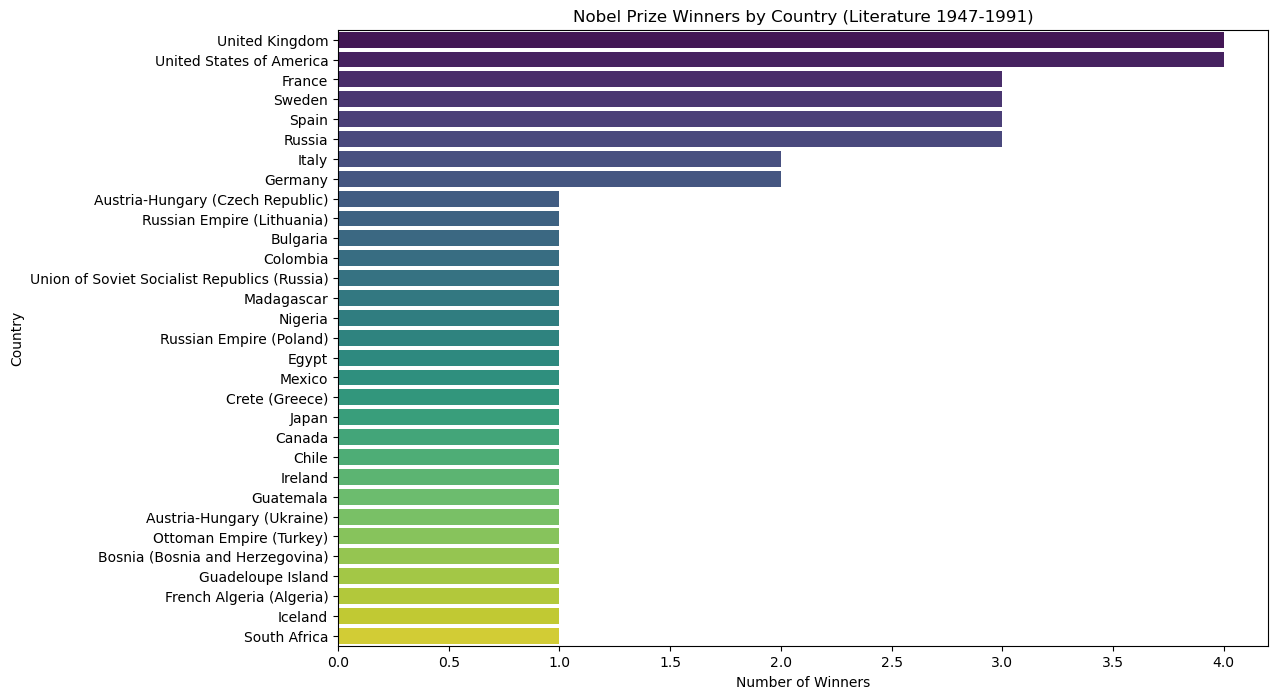

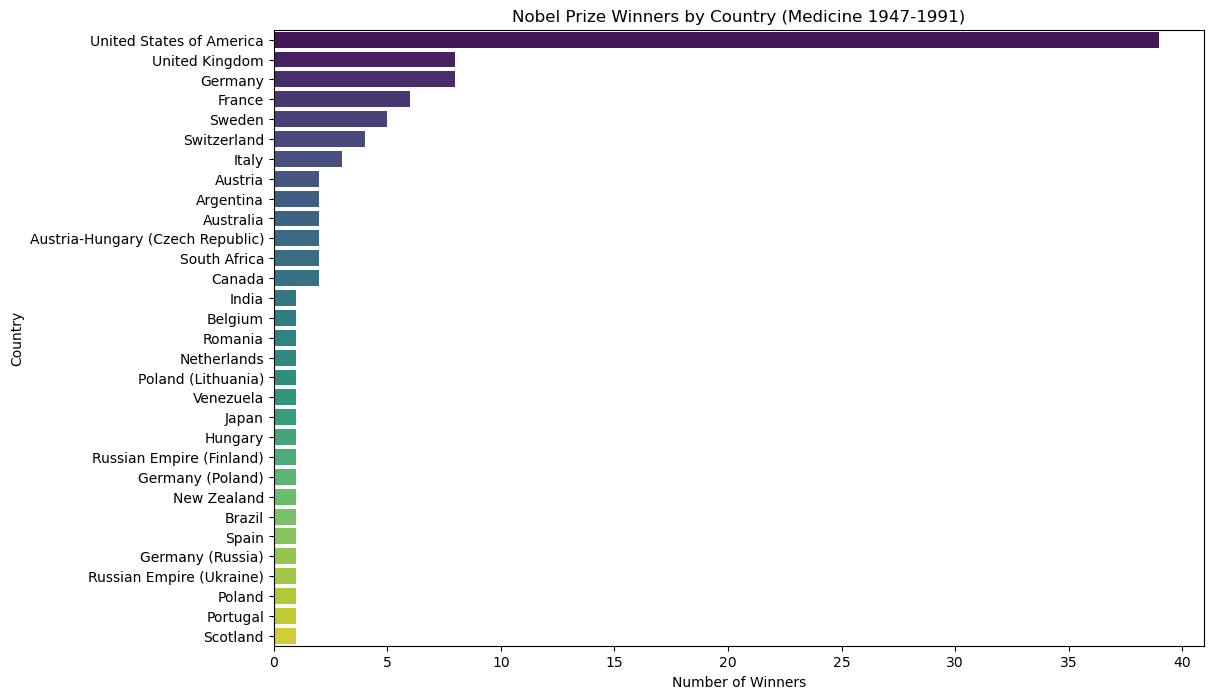

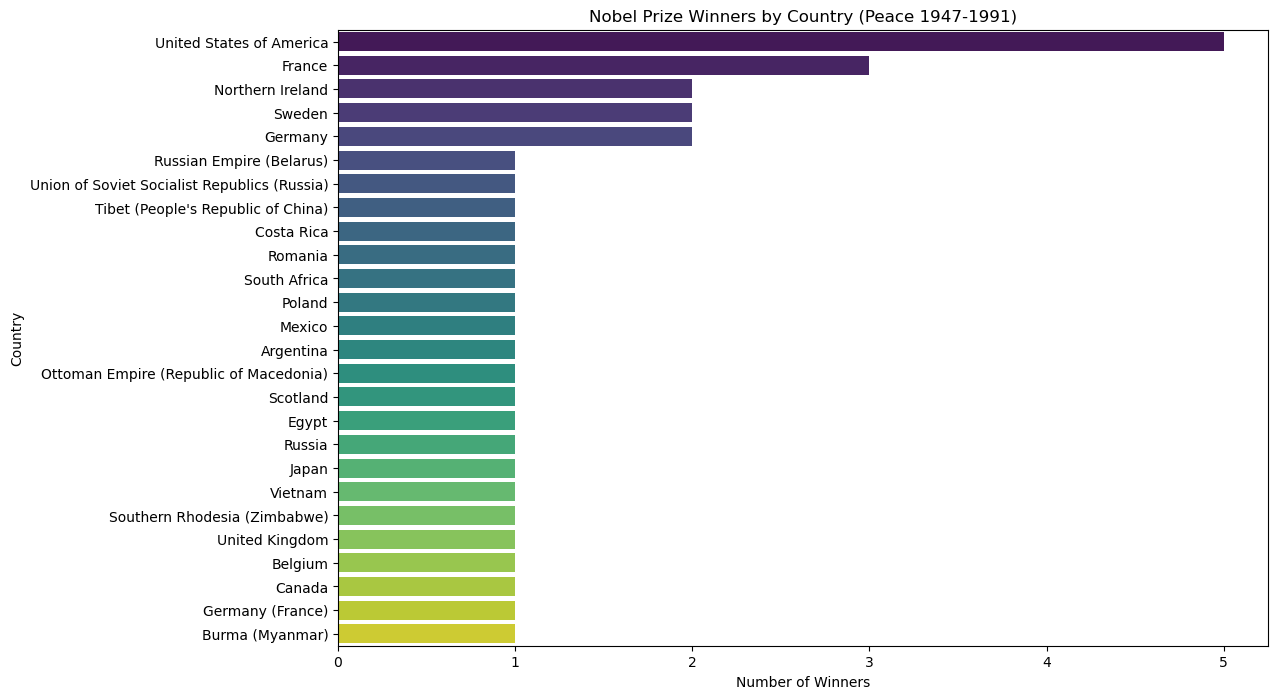

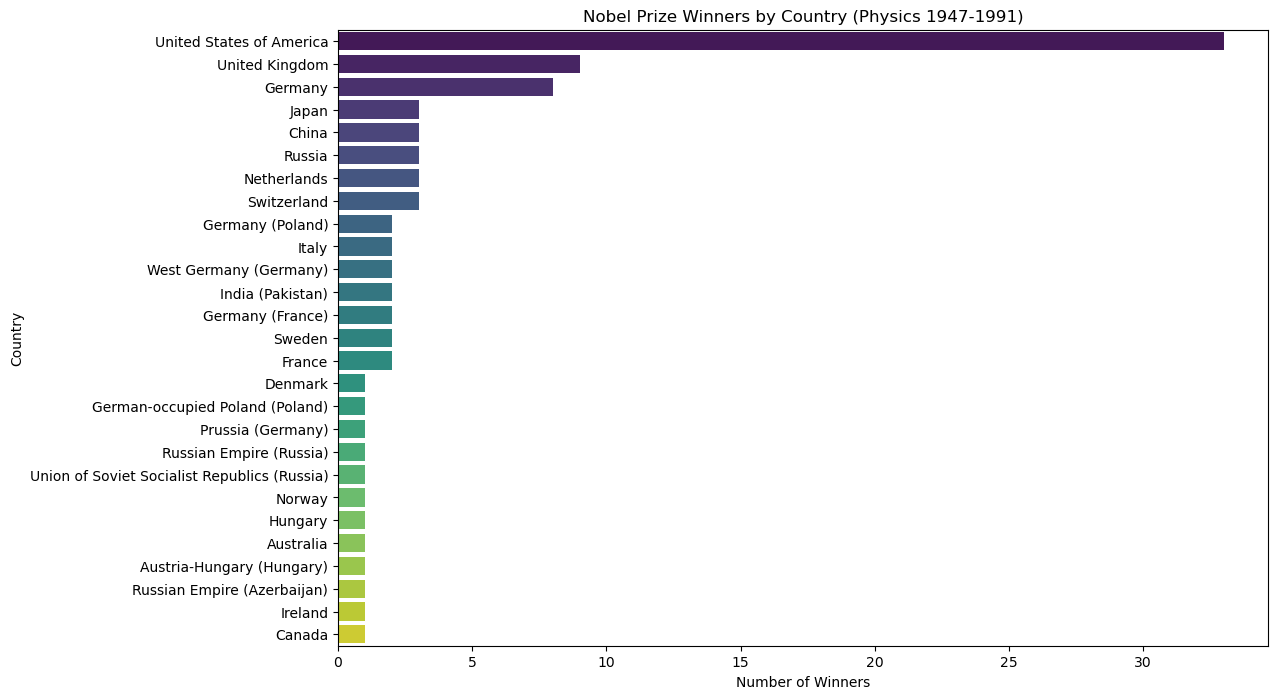

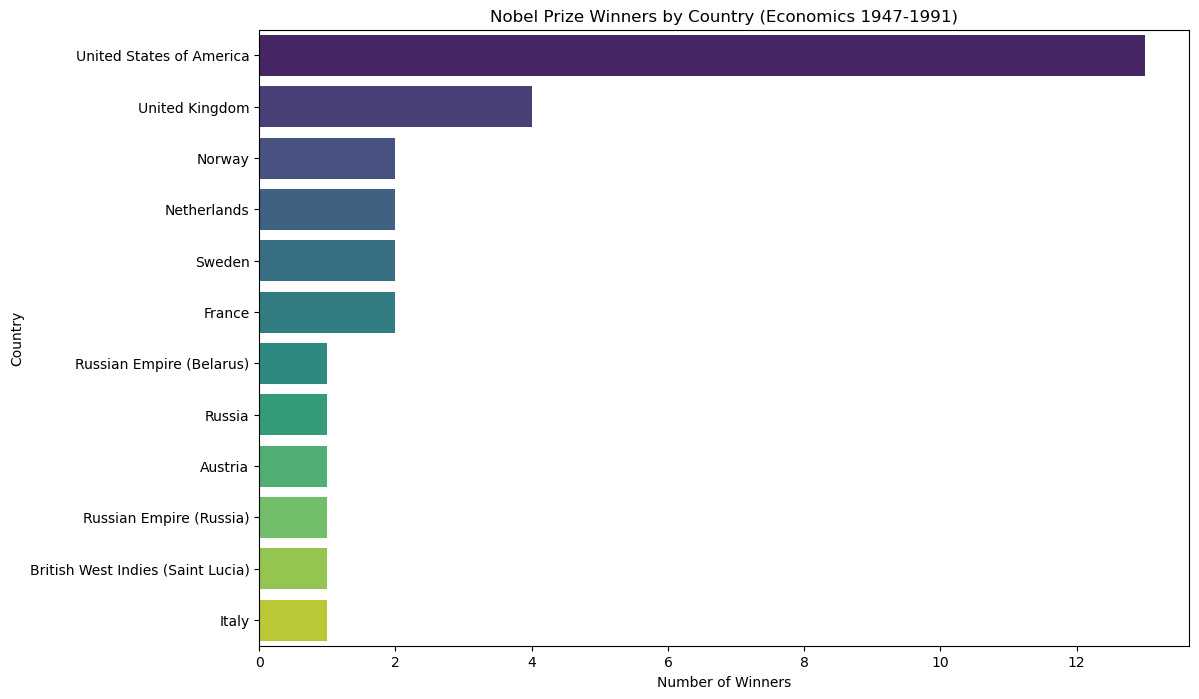

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("nobel.csv")
filtered_data = df[(df['year'] >= 1947) & (df['year'] <= 1991)]
def plot_nobel_by_category(category, data):
    category_data = data[data['category'] == category]
    country_counts = category_data['birth_country'].value_counts()
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
    plt.title(f'Nobel Prize Winners by Country ({category} 1947-1991)')
    plt.xlabel('Number of Winners')
    plt.ylabel('Country')
    plt.show()
categories = filtered_data['category'].unique()
for category in categories:
    plot_nobel_by_category(category, filtered_data)


C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


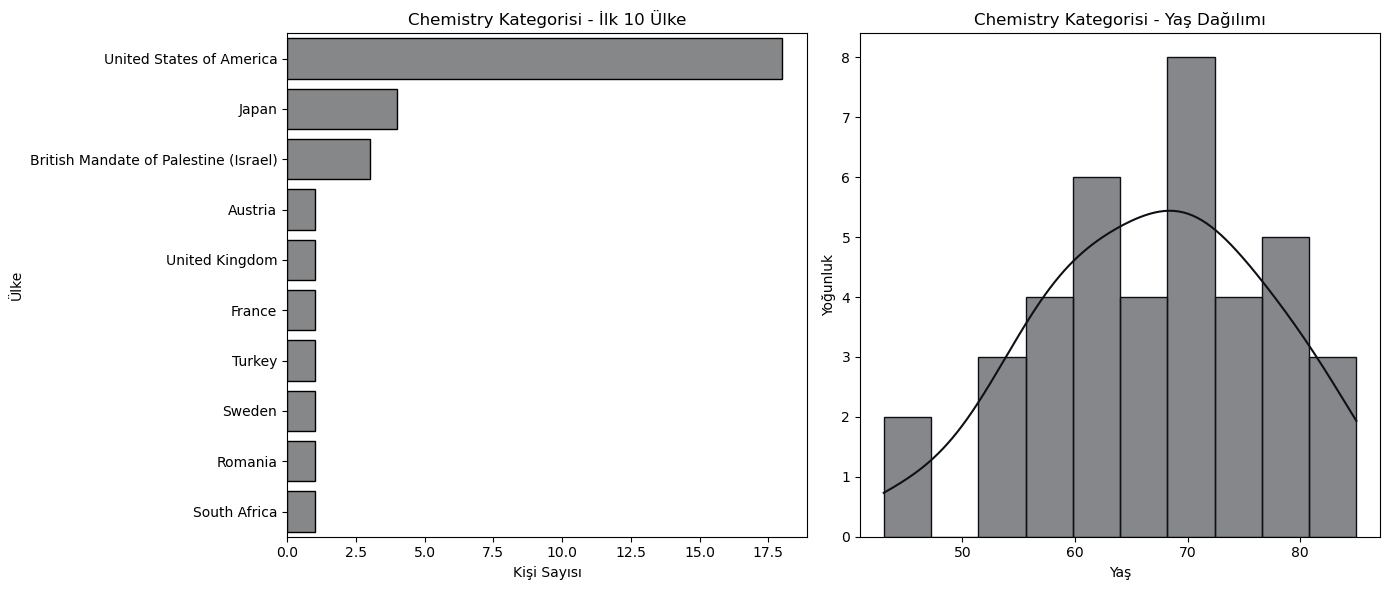

C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


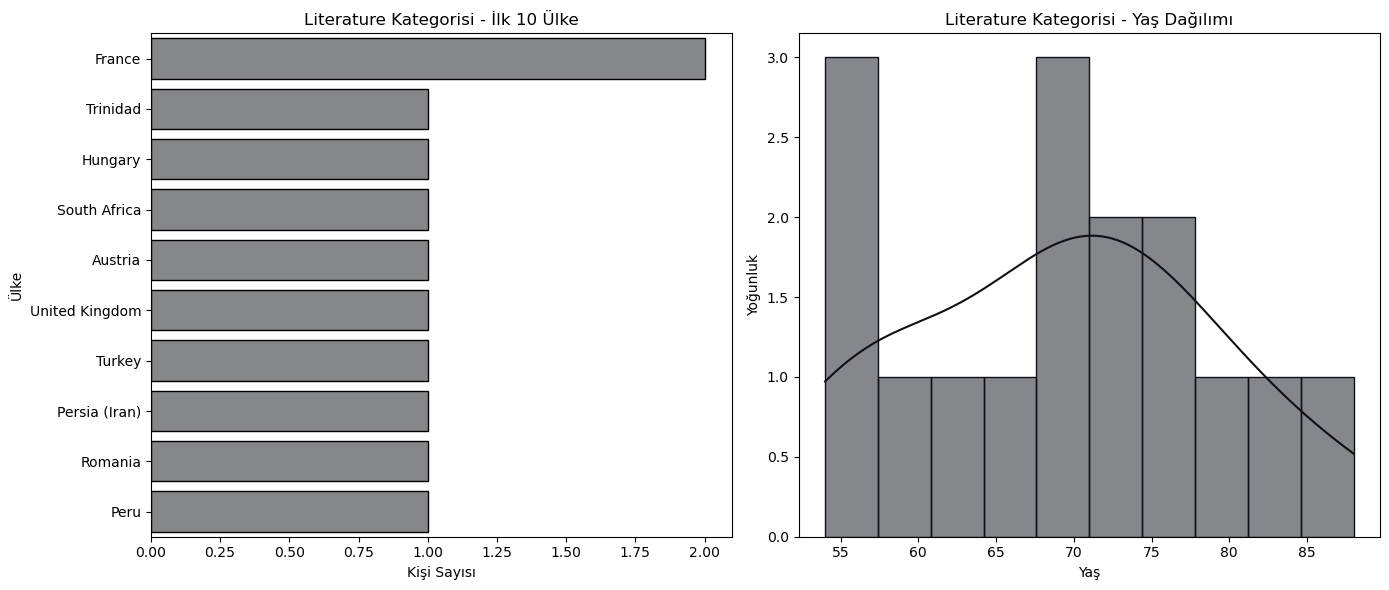

C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


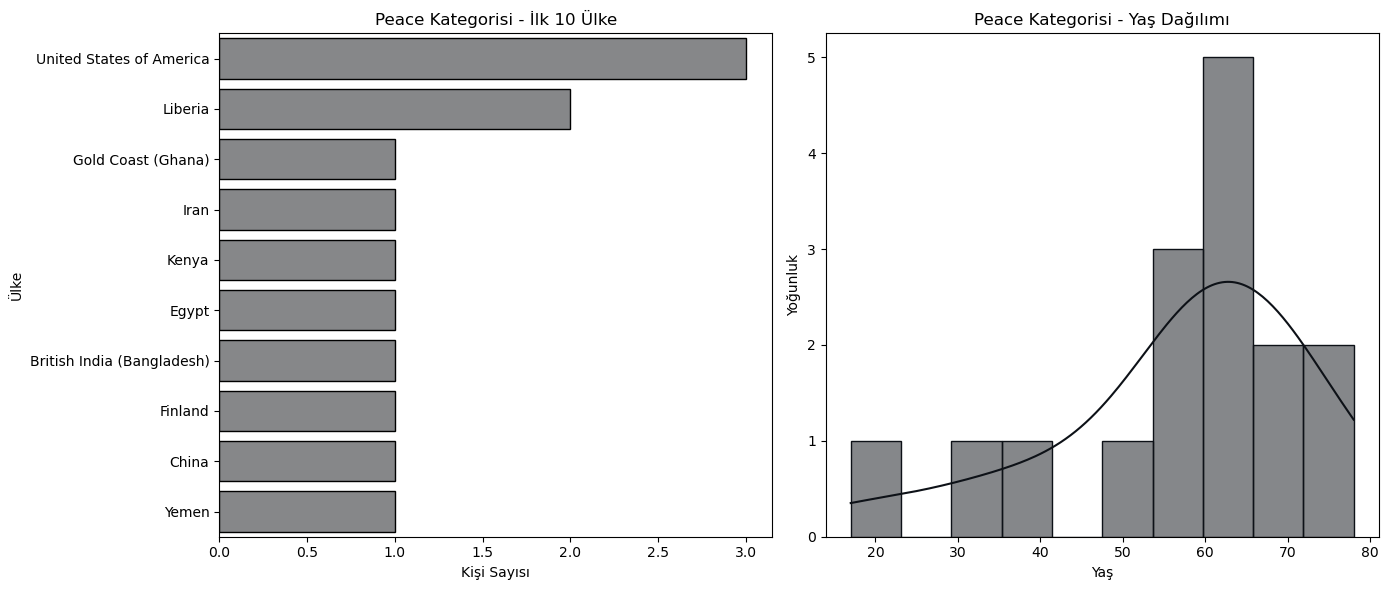

C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


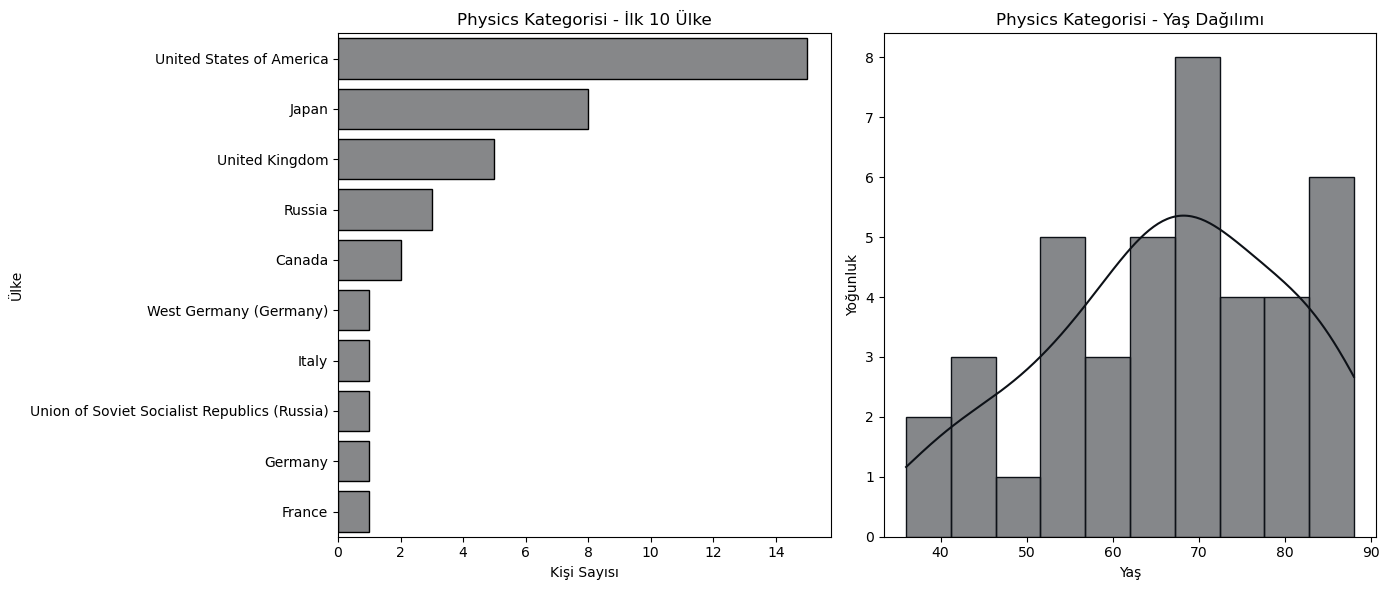

C:\Users\maste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


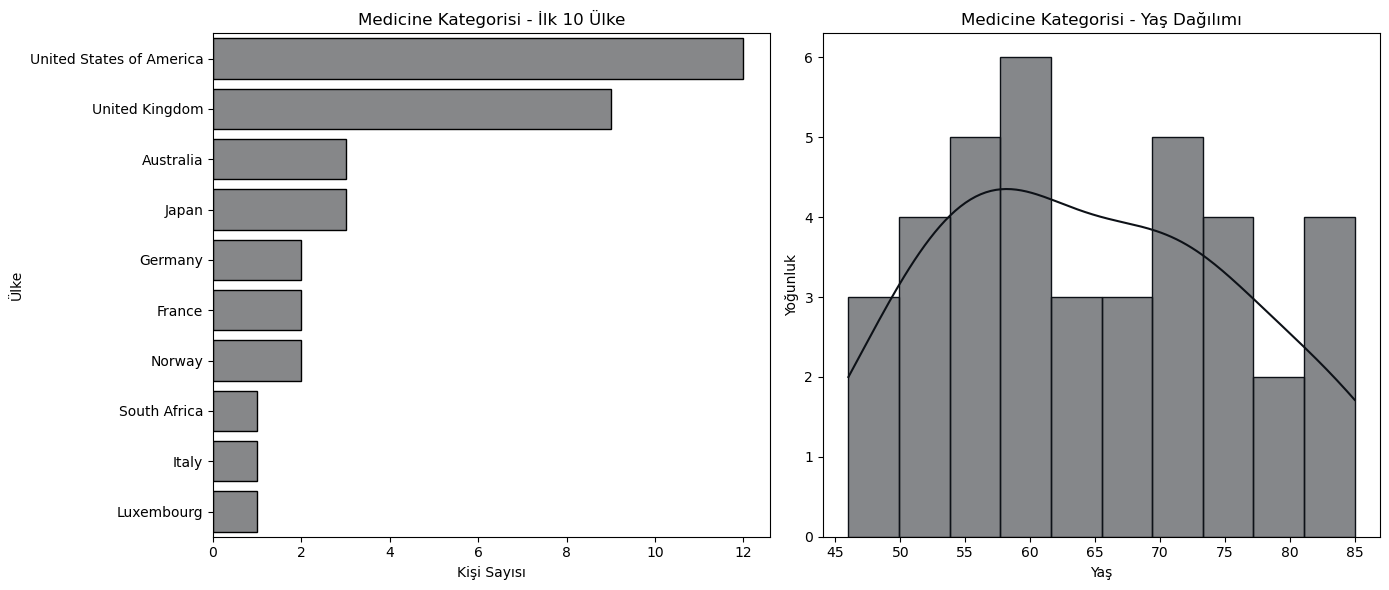

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("nobel.csv")
after_2000 = df[df['year'] > 2000].copy()
after_2000['birth_date'] = pd.to_datetime(after_2000['birth_date'])
after_2000['age_at_award'] = after_2000['year'] - after_2000['birth_date'].dt.year
categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']
for category in categories:
    category_list = after_2000[after_2000['category'] == category]

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(y='birth_country', color='#85878A', edgecolor='black', data=category_list, 
                  order=category_list['birth_country'].value_counts().iloc[:10].index)
    plt.title(f'{category} Kategorisi - İlk 10 Ülke')
    plt.xlabel('Kişi Sayısı')
    plt.ylabel('Ülke')


    plt.subplot(1, 2, 2)
    sns.histplot(category_list['age_at_award'].replace([float('inf'), -float('inf')], float('nan')).dropna(), 
                 color='#0D1117', edgecolor='#0D1117', bins=10, kde=True)
    plt.title(f'{category} Kategorisi - Yaş Dağılımı')
    plt.xlabel('Yaş')
    plt.ylabel('Yoğunluk')

    plt.tight_layout()
    plt.show()
